In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 
120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 
그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

In [69]:
# 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [71]:
df.groupby(['체중(5Kg 단위)'])['총콜레스테롤'].agg(["count", "mean", "median"])

,count,mean,median
체중(5Kg 단위),,,
20.0,6,163.000000,154.5
25.0,34,182.205882,181.0
30.0,462,188.002165,185.5
35.0,2833,189.837981,187.0
40.0,17682,190.220337,187.0
45.0,63807,191.906076,189.0
50.0,125308,193.455949,191.0
55.0,150081,194.462290,192.0
60.0,150721,194.565097,192.0


In [125]:
df = df.rename(columns={'흡연상태':'흡연', '음주여부':'음주'})
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연,음주,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [126]:
df2 = df[['흡연', '음주', '감마지티피', '총콜레스테롤', '체중(5Kg 단위)']]
df2.columns

Index(['흡연', '음주', '감마지티피', '총콜레스테롤', '체중(5Kg 단위)'], dtype='object')

In [127]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df2, index="음주", values="총콜레스테롤")

,총콜레스테롤
음주,
0.0,194.699007
1.0,196.346568


In [128]:
# 음주여부에 따른 총콜레스테롤 평균을 구합니다.
pd.pivot_table(df2, index="흡연", values="총콜레스테롤")

,총콜레스테롤
흡연,
1.0,195.323920
2.0,194.755130
3.0,196.681768


In [129]:
df120 = df2[df2['체중(5Kg 단위)']>=120]
df120

,흡연,음주,감마지티피,총콜레스테롤,체중(5Kg 단위)
1219,3.0,0.0,47.0,182.0,120.0
2309,3.0,0.0,19.0,107.0,155.0
3497,3.0,1.0,111.0,214.0,120.0
3685,2.0,0.0,58.0,218.0,140.0
5788,1.0,0.0,35.0,194.0,140.0
...,...,...,...,...,...
996544,3.0,1.0,76.0,244.0,125.0
996828,3.0,1.0,82.0,194.0,120.0
997152,1.0,0.0,165.0,208.0,120.0
997414,3.0,0.0,62.0,197.0,135.0


In [133]:
df120['흡연'] = df120['흡연'].replace({1.0 : "흡연안함", 2.0: "끊음", 3.0: "흡연중"})
df120

/var/folders/6t/hz4vrl292n5_20bzcz6lg2hh0000gn/T/ipykernel_25200/4185946692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df120['흡연'] = df120['흡연'].replace({1.0 : "흡연안함", 2.0: "끊음", 3.0: "흡연중"})


,흡연,음주,감마지티피,총콜레스테롤,체중(5Kg 단위)
1219,흡연중,0.0,47.0,182.0,120.0
2309,흡연중,0.0,19.0,107.0,155.0
3497,흡연중,1.0,111.0,214.0,120.0
3685,끊음,0.0,58.0,218.0,140.0
5788,흡연안함,0.0,35.0,194.0,140.0
...,...,...,...,...,...
996544,흡연중,1.0,76.0,244.0,125.0
996828,흡연중,1.0,82.0,194.0,120.0
997152,흡연안함,0.0,165.0,208.0,120.0
997414,흡연중,0.0,62.0,197.0,135.0


In [135]:
df120['음주'] = df120['음주'].replace({0.0: "안마심", 1.0: "마심"})
df120

/var/folders/6t/hz4vrl292n5_20bzcz6lg2hh0000gn/T/ipykernel_25200/491879423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df120['음주'] = df120['음주'].replace({0.0: "안마심", 1.0: "마심"})


,흡연,음주,감마지티피,총콜레스테롤,체중(5Kg 단위)
1219,흡연중,안마심,47.0,182.0,120.0
2309,흡연중,안마심,19.0,107.0,155.0
3497,흡연중,마심,111.0,214.0,120.0
3685,끊음,안마심,58.0,218.0,140.0
5788,흡연안함,안마심,35.0,194.0,140.0
...,...,...,...,...,...
996544,흡연중,마심,76.0,244.0,125.0
996828,흡연중,마심,82.0,194.0,120.0
997152,흡연안함,안마심,165.0,208.0,120.0
997414,흡연중,안마심,62.0,197.0,135.0


In [136]:
df120.head()

,흡연,음주,감마지티피,총콜레스테롤,체중(5Kg 단위)
1219,흡연중,안마심,47.0,182.0,120.0
2309,흡연중,안마심,19.0,107.0,155.0
3497,흡연중,마심,111.0,214.0,120.0
3685,끊음,안마심,58.0,218.0,140.0
5788,흡연안함,안마심,35.0,194.0,140.0


In [137]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df120, index="음주", values="감마지티피")

,감마지티피
음주,
마심,75.628989
안마심,55.662763


In [29]:
# 음주여부에 따른 총콜레스테롤 평균을 구합니다.
pd.pivot_table(df120, index="음주", values="총콜레스테롤")

,총콜레스테롤
음주,
마심,201.159574
안마심,196.060890


In [138]:
pd.pivot_table(df120, index="음주", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주,,,,,,,,
마심,42.0,60.5,93.0,752.0,699.0,75.628989,10.0,56.373699
안마심,31.0,45.0,67.0,427.0,326.0,55.662763,8.0,41.425068


In [139]:
pd.pivot_table(df120, index=["음주", "체중(5Kg 단위)"], values="감마지티피", aggfunc="describe")

25%    50%     75%  count    max        mean    min  \
음주  체중(5Kg 단위)                                                           
마심  120.0        43.00   61.0   96.00  353.0  451.0   76.005666   15.0   
    125.0        41.00   58.0   93.75  178.0  362.0   73.505618   16.0   
    130.0        40.00   66.0   98.25  108.0  699.0   83.129630   19.0   
    135.0        37.75   55.5   77.00   48.0  370.0   73.104167   10.0   
    140.0        44.00   59.5   82.75   30.0  158.0   69.366667   29.0   
    145.0        57.50   73.0   84.75   16.0  118.0   71.375000   25.0   
    150.0        57.50   64.0   84.00    7.0  105.0   67.857143   23.0   
    155.0        43.50   60.0   68.50    3.0   77.0   54.666667   27.0   
    160.0        30.50   42.0   56.00    4.0   65.0   44.500000   29.0   
    165.0       147.00  147.0  147.00    1.0  147.0  147.000000  147.0   
    170.0        53.50   60.0   86.50    3.0  113.0   73.333333   47.0   
    180.0        65.00   65.0   65.00    1.0   65.0   65.000000   65.0   
안마심 120.0        30.50   42.0   65.00  179.0  314.0   55.916201    8.0   
    125.0        30.50   47.5   68.75  106.0  181.0   54.273585   12.0   
    130.0        32.50   39.0   50.25   52.0  142.0   48.634615   10.0   
    135.0        35.50   46.5   71.75   36.0  161.0   58.138889   11.0   
    140.0        32.00   46.0   71.00   27.0  222.0   59.925926   11.0   
    145.0        29.25   49.0   72.00   10.0  126.0   54.700000   12.0   
    150.0        27.75   33.5   37.75    6.0   81.0   40.000000   27.0   
    155.0        38.50   45.5   55.50    4.0   84.0   48.500000   19.0   
    160.0       190.25  235.5  280.75    2.0  326.0  235.500000  145.0   
    165.0        51.00   63.0   75.00    2.0   87.0   63.000000   39.0   
    170.0        80.00   80.0   80.00    1.0   80.0   80.000000   80.0   
    175.0        56.00   56.0   56.00    1.0   56.0   56.000000   56.0   
    180.0        52.00   52.0   52.00    1.0   52.0   52.000000   52.0   

                       std  
음주  체중(5Kg 단위)              
마심  120.0        50.694495  
    125.0        54.271367  
    130.0        79.738368  
    135.0        66.861317  
    140.0        33.879587  
    145.0        23.932892  
    150.0        26.504267  
    155.0        25.423087  
    160.0        17.464249  
    165.0              NaN  
    170.0        34.961884  
    180.0              NaN  
안마심 120.0        46.887850  
    125.0        31.181048  
    130.0        27.343156  
    135.0        34.507269  
    140.0        45.868479  
    145.0        34.506199  
    150.0        20.649455  
    155.0        26.764404  
    160.0       127.986327  
    165.0        33.941125  
    170.0              NaN  
    175.0              NaN  
    180.0              NaN

In [140]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 
# # 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

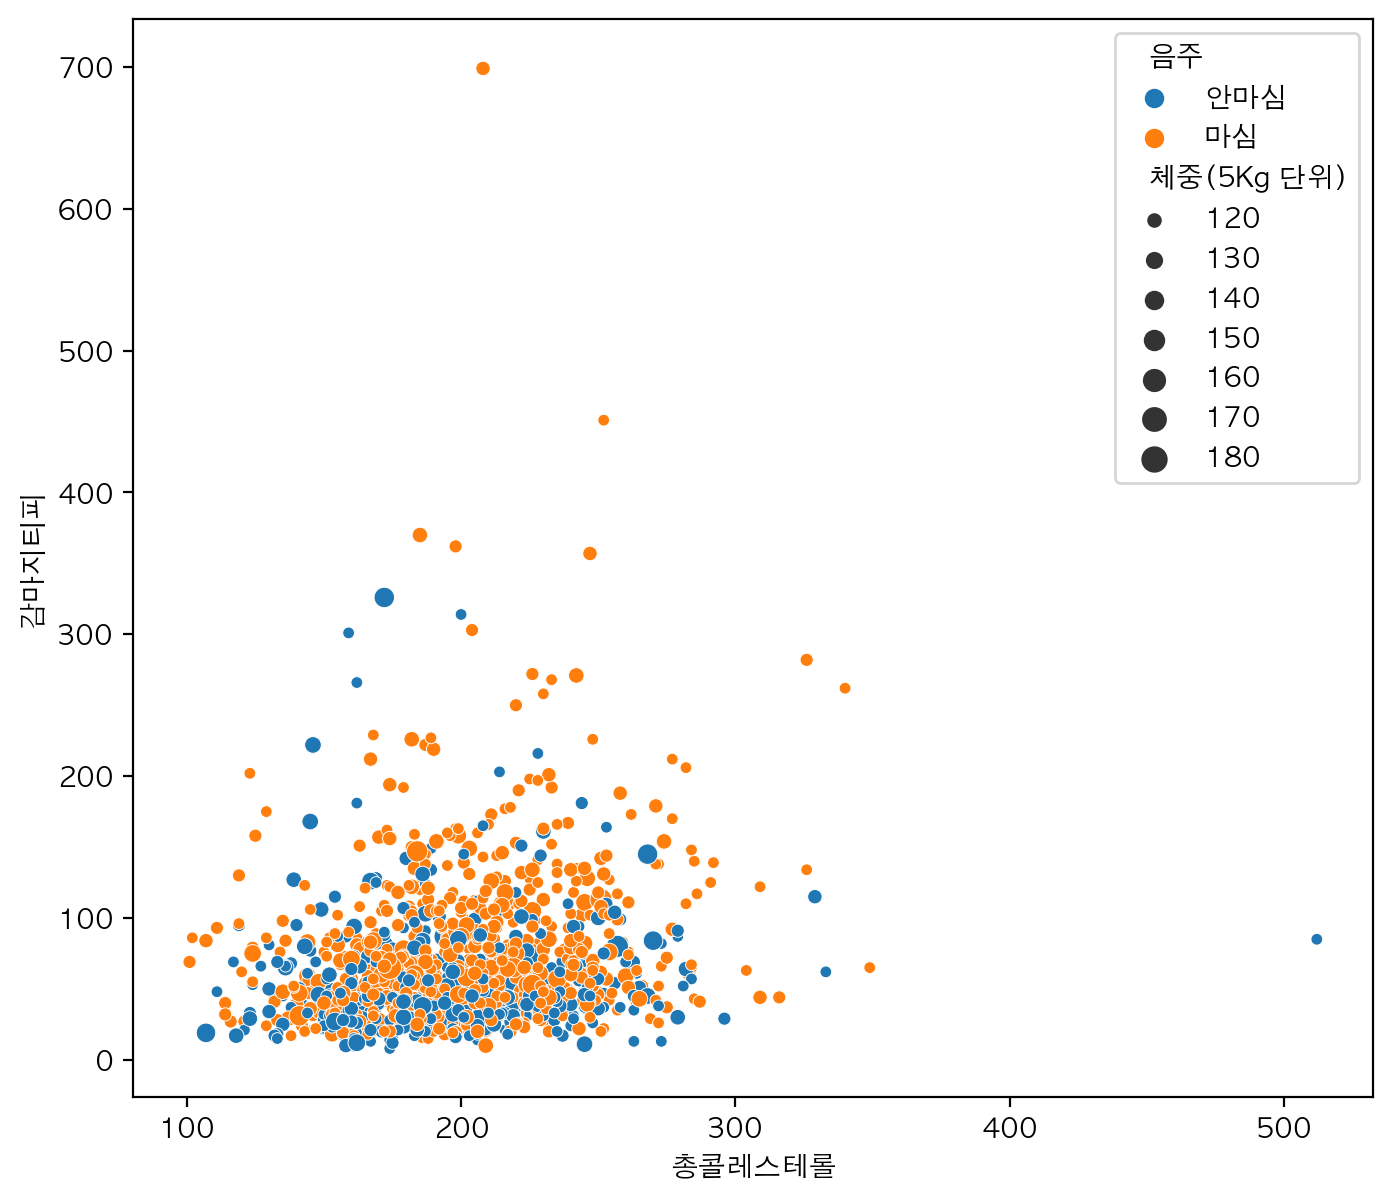

In [141]:
# scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df120, x="총콜레스테롤", y="감마지티피", hue="음주", size="체중(5Kg 단위)")

In [142]:
df_sample = df120.sample(1000, random_state=1)
df_sample.shape

(1000, 5)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

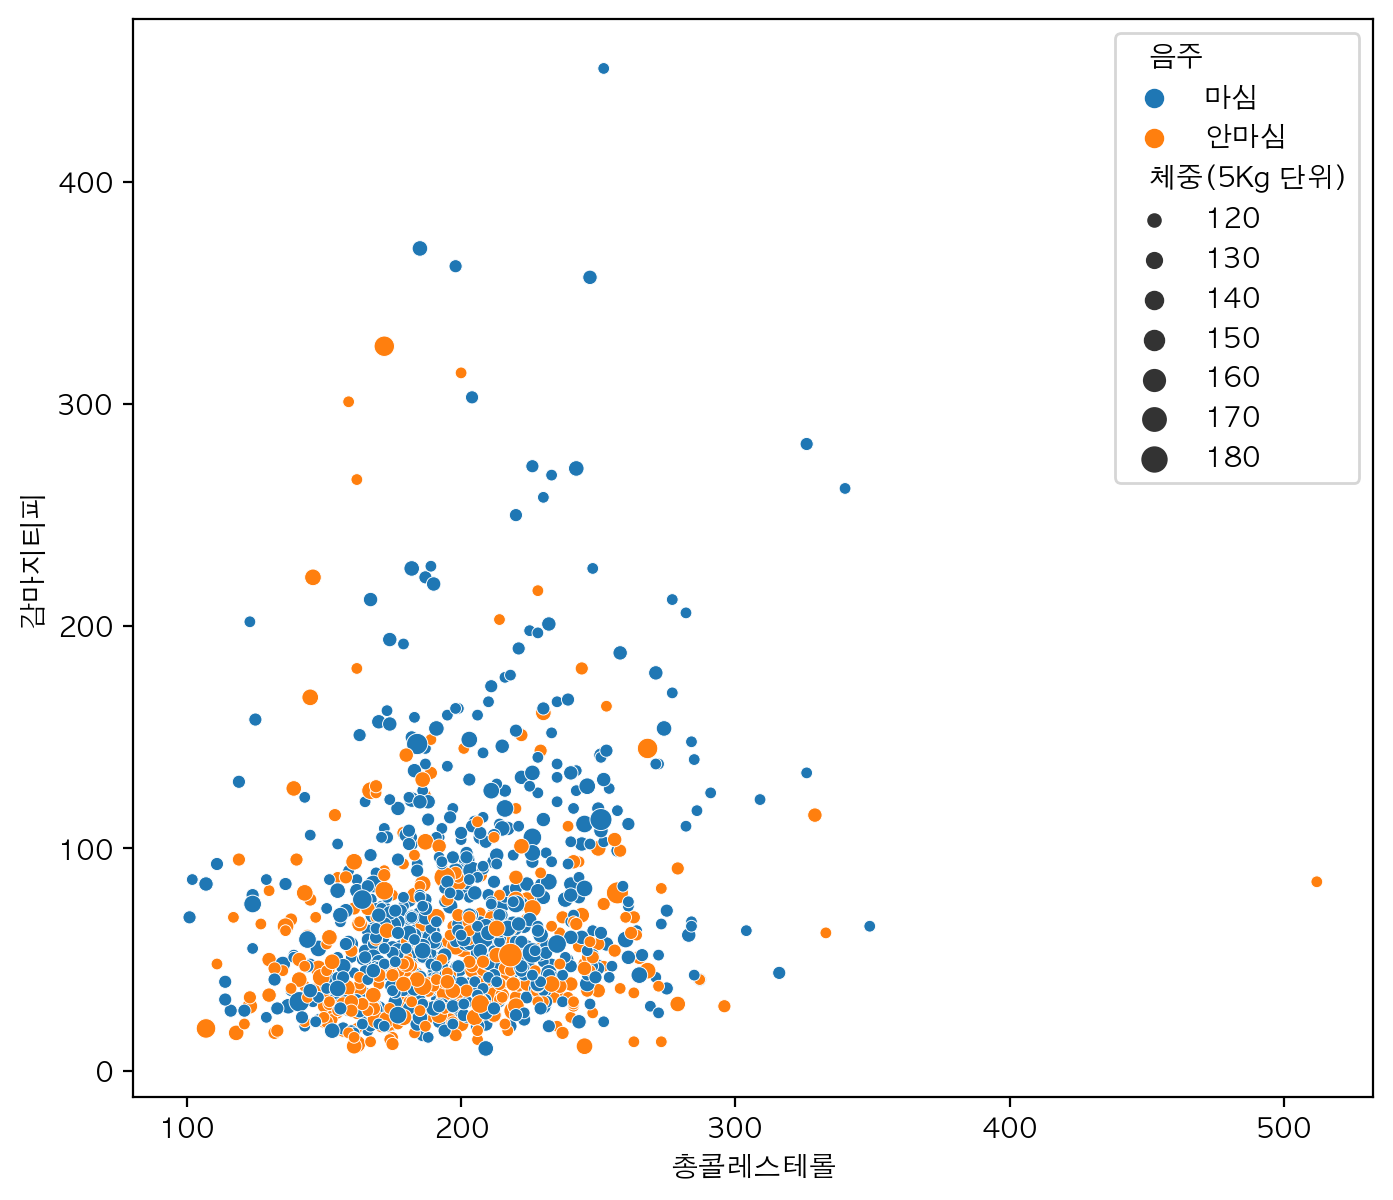

In [143]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="총콜레스테롤", y="감마지티피", hue="음주", size="체중(5Kg 단위)")

<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

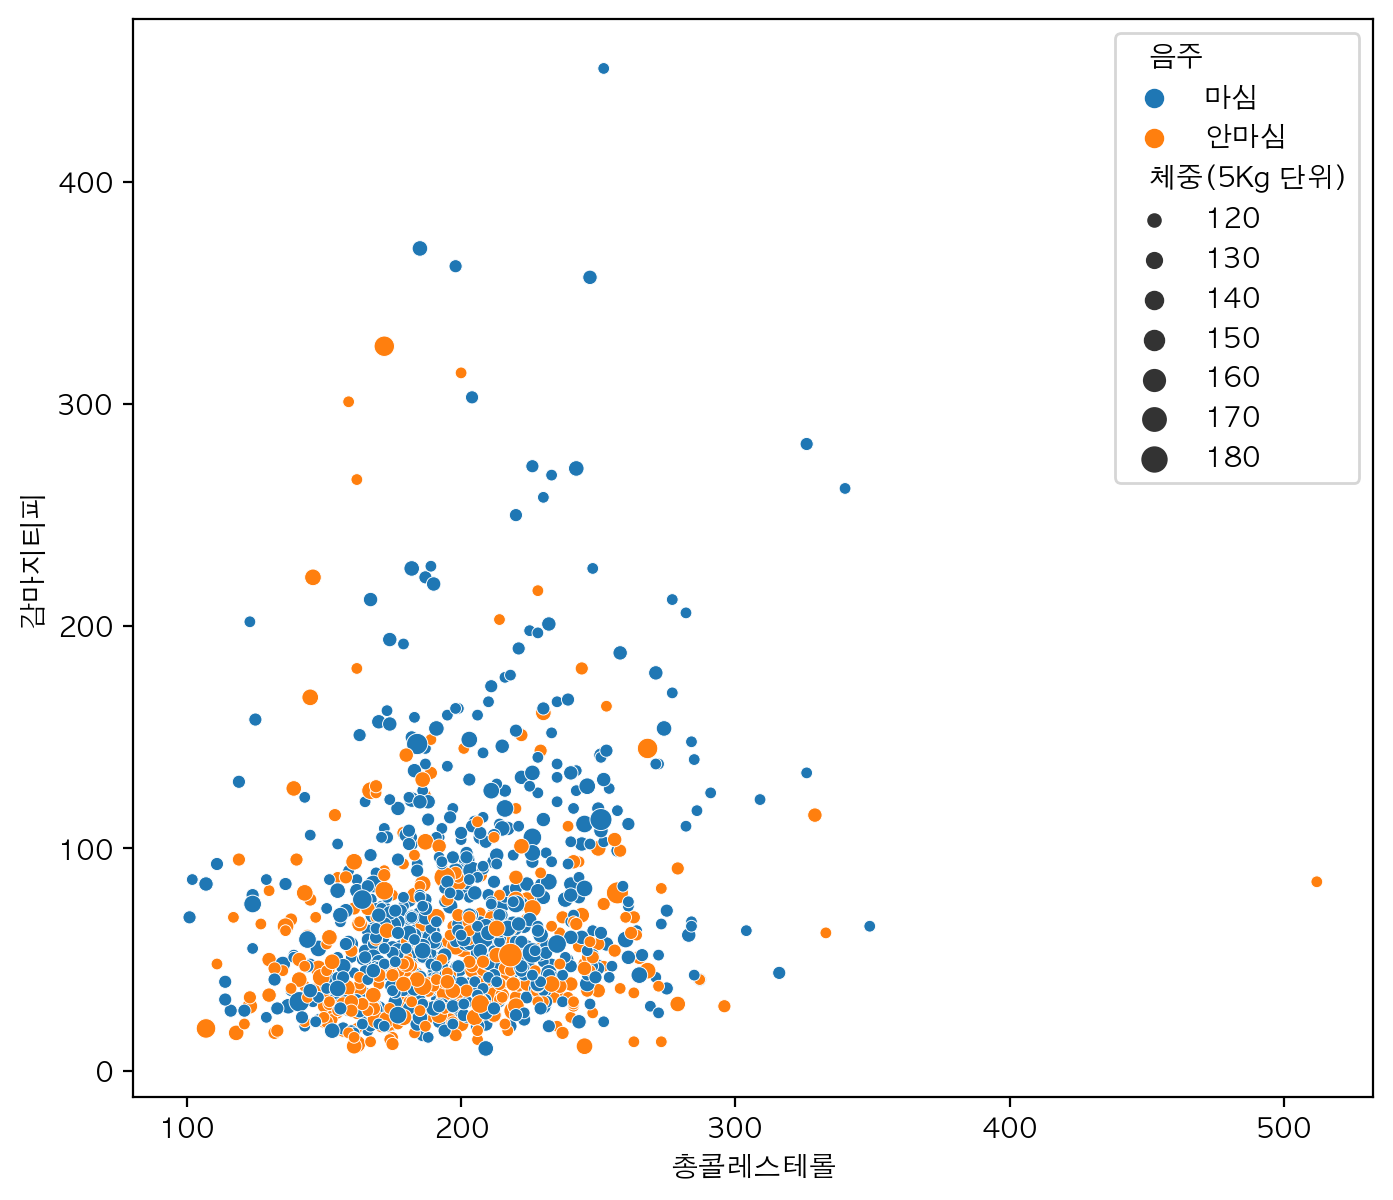

In [144]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="총콜레스테롤", y="감마지티피", hue="음주", size="체중(5Kg 단위)")

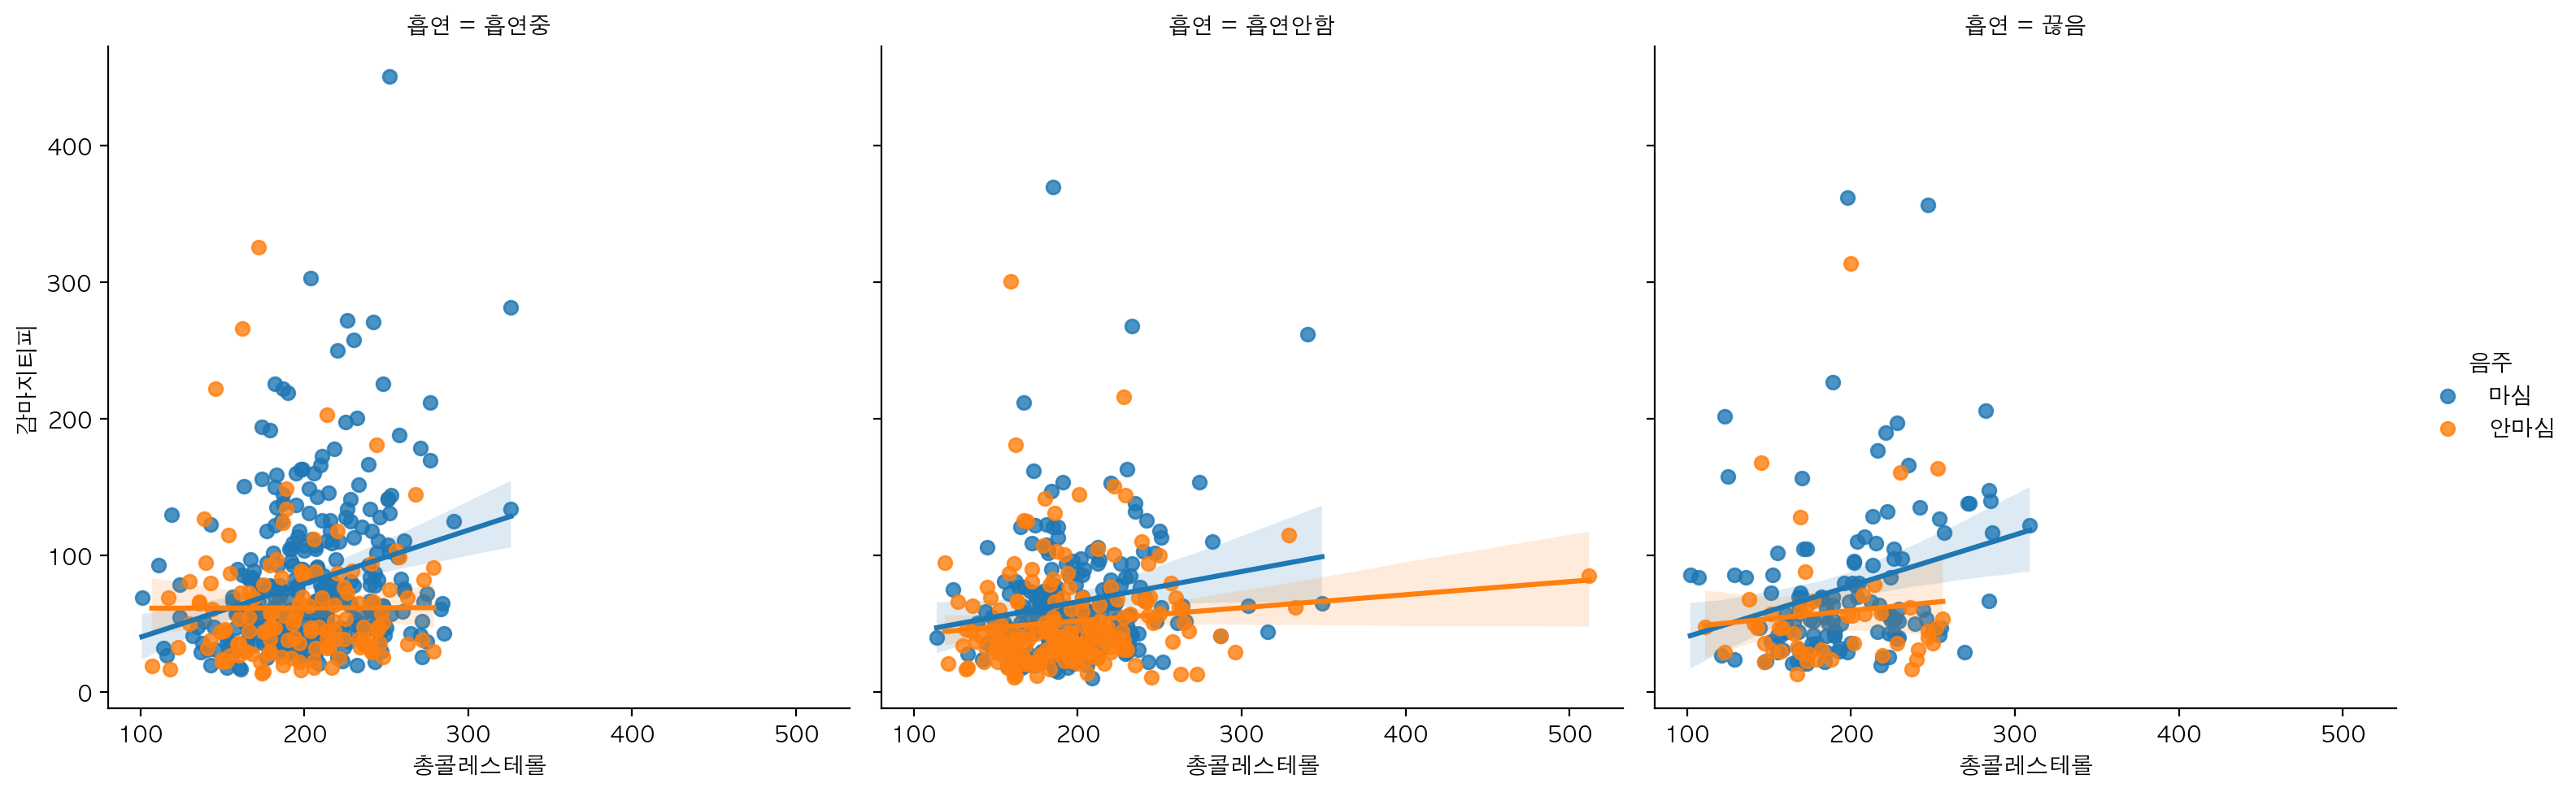

In [145]:
#implot 상관관계 보기
sns.lmplot(data=df_sample, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

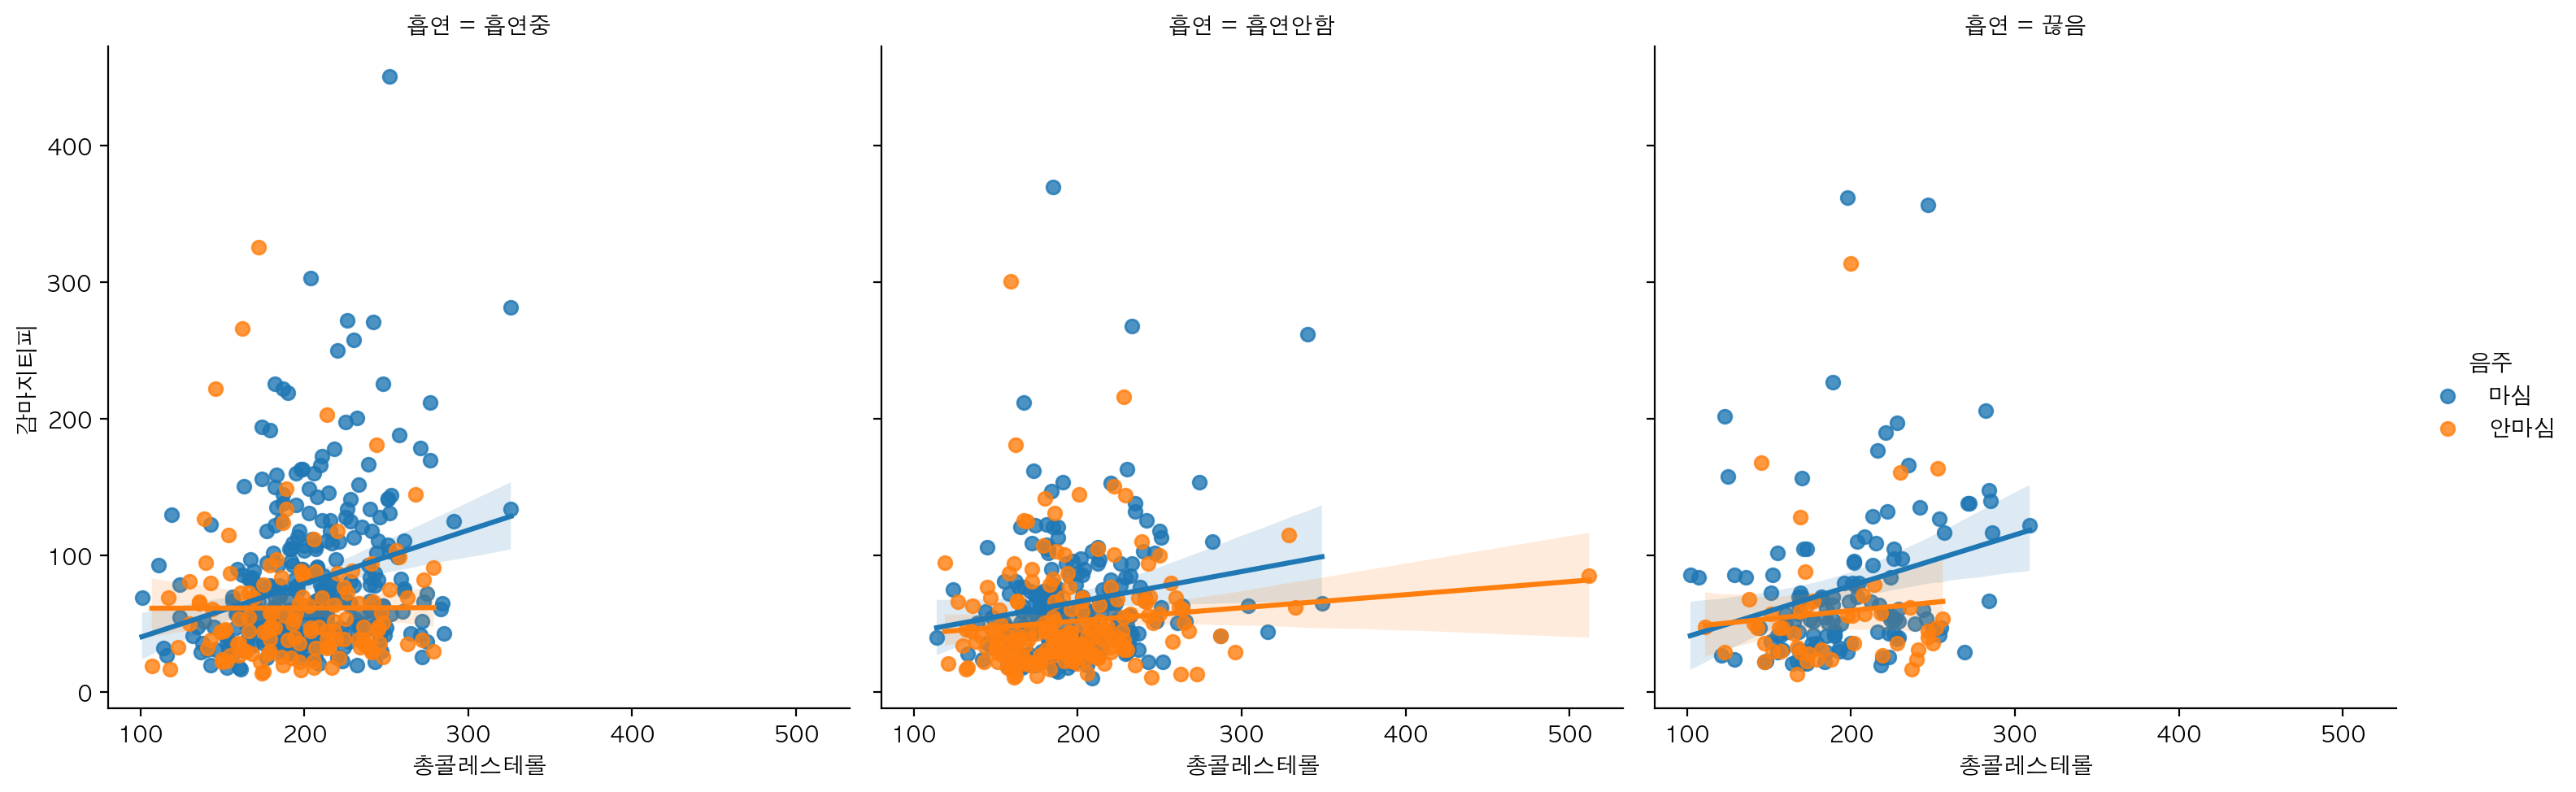

In [146]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다. 

sns.lmplot(data=df_sample, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")